In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
f1=pd.read_csv("DRDO.csv")
f2=pd.read_csv("FIFA.csv")
f3=pd.read_csv("WHO.csv")

In [3]:
df=pd.concat([f1,f2,f3])
df=df.drop('Unnamed: 0',axis=1)
df

,Tweet,Label
0,Congratulations @BrahMosMissile team for 25 ye...,Technology
1,SemEval (the International Workshop on Semanti...,Technology
2,#DRDOUpdates | In SemEval 2023 Task 2: Multili...,Technology
3,"A panel discussion on ""The Perspectives of Res...",Technology
4,"Many eminent keynote speakers from #DRDO, @IAF...",Technology
...,...,...
996,"@DrTedros ""WHO continues to urge caution, and ...",Health
997,"@DrTedros ""Testing and sequencing rates remain...",Health
998,"@DrTedros ""We have come a long way, and this i...",Health
999,"@DrTedros ""Just over 9,400 #COVID19 deaths wer...",Health


In [4]:
#preprocessing

import re
import string

def urlRemove(tweet):
    tweet=re.sub(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))",'',tweet)
    tweet=tweet.strip().replace('\n', '')
    tweet="".join([i for i in tweet if i not in string.punctuation])
    tweet=re.sub(r'\s+', ' ', tweet)
    return tweet.lower()

In [5]:
df['newTweet1']=df['Tweet'].apply(lambda x: urlRemove(x))
df

,Tweet,Label,newTweet1
0,Congratulations @BrahMosMissile team for 25 ye...,Technology,congratulations brahmosmissile team for 25 yea...
1,SemEval (the International Workshop on Semanti...,Technology,semeval the international workshop on semantic...
2,#DRDOUpdates | In SemEval 2023 Task 2: Multili...,Technology,drdoupdates in semeval 2023 task 2 multilingua...
3,"A panel discussion on ""The Perspectives of Res...",Technology,a panel discussion on the perspectives of rese...
4,"Many eminent keynote speakers from #DRDO, @IAF...",Technology,many eminent keynote speakers from drdo iafmcc...
...,...,...,...
996,"@DrTedros ""WHO continues to urge caution, and ...",Health,drtedros who continues to urge caution and we ...
997,"@DrTedros ""Testing and sequencing rates remain...",Health,drtedros testing and sequencing rates remain l...
998,"@DrTedros ""We have come a long way, and this i...",Health,drtedros we have come a long way and this is d...
999,"@DrTedros ""Just over 9,400 #COVID19 deaths wer...",Health,drtedros just over 9400 covid19 deaths were re...


In [6]:
#lemmatization

import nltk
from nltk.stem import WordNetLemmatizer

def lemmatizeTweet(tweet):
    tokens=re.split(' ',tweet)
    stopwords=nltk.corpus.stopwords.words('english')
    tokens= [i for i in tokens if i not in stopwords]
    lemmatizer=WordNetLemmatizer()
    lemm_text = [lemmatizer.lemmatize(word) for word in tokens]
    lemm_text=" ".join(lemm_text)
    return lemm_text

In [7]:
import nltk

df['newTweet']=df['newTweet1'].apply(lambda x: lemmatizeTweet(x))
df=df.drop('Tweet',axis=1)
df=df.drop('newTweet1',axis=1)
df

,Label,newTweet
0,Technology,congratulation brahmosmissile team 25 year glo...
1,Technology,semeval international workshop semantic evalua...
2,Technology,drdoupdates semeval 2023 task 2 multilingual c...
3,Technology,panel discussion perspective research developm...
4,Technology,many eminent keynote speaker drdo iafmcc halhq...
...,...,...
996,Health,drtedros continues urge caution continue urge ...
997,Health,drtedros testing sequencing rate remain low gl...
998,Health,drtedros come long way definitely cause optimi...
999,Health,drtedros 9400 covid19 death reported last week...


In [8]:
# df=df.sample(frac=1)
x=df['newTweet']
y=df['Label']

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [10]:
#splitting data into train and test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(ngram_range=(1,2))

x_train=tf_idf.fit_transform(x_train)
x_test=tf_idf.transform(x_test)

x_train=x_train.toarray()
x_test=x_test.toarray()

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [13]:
y_pred=gnb.predict(x_test)

In [14]:
acc=accuracy_score(y_pred,y_test)
print('Accuracy Score = %0.2F'%(acc*100))
prec=precision_score(y_pred,y_test,average='weighted')
print('Precision Score = %0.2F'%(prec*100))
rec=recall_score(y_pred,y_test,average='weighted')
print('Recall Score = %0.2F'%(rec*100))
f1=f1_score(y_pred,y_test,average='weighted')
print('F1 Score = %0.2F'%(f1*100))

Accuracy Score = 94.67
Precision Score = 94.77
Recall Score = 94.67
F1 Score = 94.66


In [15]:
con=confusion_matrix(y_pred,y_test)
con

array([[310,  12,   3],
       [  7, 275,  22],
       [  1,   3, 268]], dtype=int64)

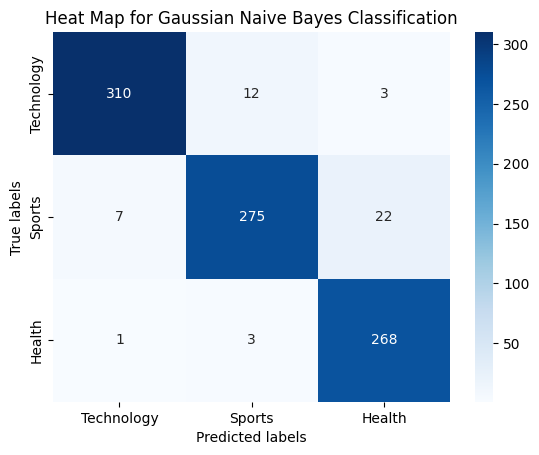

In [16]:
ax= plt.subplot()
sb.heatmap(con, annot=True, fmt='g',cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Heat Map for Gaussian Naive Bayes Classification')
ax.xaxis.set_ticklabels(['Technology','Sports','Health'])
ax.yaxis.set_ticklabels(['Technology','Sports','Health']);


In [17]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred=lr.predict(x_test)

In [19]:
acc=accuracy_score(y_pred,y_test)
print('Accuracy Score = %0.2F'%(acc*100))
prec=precision_score(y_pred,y_test,average='weighted')
print('Precision Score = %0.2F'%(prec*100))
rec=recall_score(y_pred,y_test,average='weighted')
print('Recall Score = %0.2F'%(rec*100))
f1=f1_score(y_pred,y_test,average='weighted')
print('F1 Score = %0.2F'%(f1*100))

Accuracy Score = 95.01
Precision Score = 95.17
Recall Score = 95.01
F1 Score = 94.98


In [20]:
con=confusion_matrix(y_pred,y_test)
con

array([[303,   6,   4],
       [ 13, 284,  20],
       [  2,   0, 269]], dtype=int64)

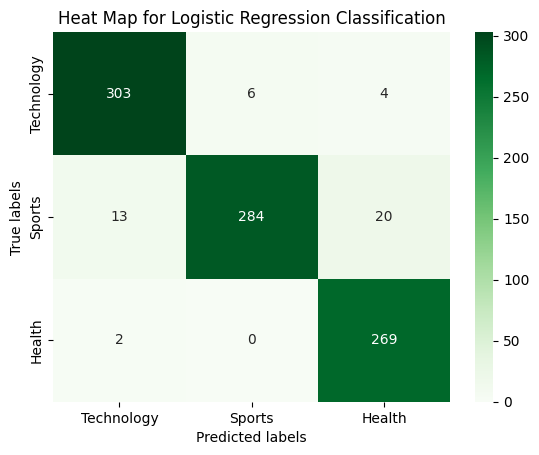

In [21]:
axis=plt.subplot()
sb.heatmap(con, annot=True, fmt='g',cmap='Greens')

# labels, title and ticks
axis.set_xlabel('Predicted labels')
axis.set_ylabel('True labels')
axis.set_title('Heat Map for Logistic Regression Classification')
axis.xaxis.set_ticklabels(['Technology','Sports','Health'])
axis.yaxis.set_ticklabels(['Technology','Sports','Health']);